<a href="https://colab.research.google.com/github/amaliyazar/EuropeMetro/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Homework_Zaryvnykh_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 

In [ ]:
import numpy as np

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
import matplotlib

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pylab as pl

In [ ]:
import matplotlib.gridspec as gridspec

In [ ]:
from datetime import date, timedelta, datetime

In [ ]:
import seaborn as sns

In [ ]:
url = "https://raw.githubusercontent.com/amaliyazar/compling/master/Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv"

In [ ]:
data = pd.read_csv(url)

In [ ]:
data.head(5)

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,09/07/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4967 non-null   object 
 1   Time                   3457 non-null   object 
 2   Location               4963 non-null   object 
 3   Operator               4957 non-null   object 
 4   Flight #               1315 non-null   object 
 5   Route                  4193 non-null   object 
 6   AC Type                4952 non-null   object 
 7   Registration           4694 non-null   object 
 8   cn/ln                  4299 non-null   object 
 9   Aboard                 4949 non-null   float64
 10  Aboard Passangers      4738 non-null   float64
 11  Aboard Crew            4741 non-null   float64
 12  Fatalities             4959 non-null   float64
 13  Fatalities Passangers  4725 non-null   float64
 14  Fatalities Crew        4726 non-null   float64
 15  Grou

In [ ]:
data.isnull().sum()

Date                        0
Time                     1510
Location                    4
Operator                   10
Flight #                 3652
Route                     774
AC Type                    15
Registration              273
cn/ln                     668
Aboard                     18
Aboard Passangers         229
Aboard Crew               226
Fatalities                  8
Fatalities Passangers     242
Fatalities Crew           241
Ground                     41
Summary                    64
dtype: int64

In [ ]:
data['Time'] = data['Time'].replace(np.nan, '00:00') 
data['Time'] = data['Time'].str.replace('91:5', '9:15')
data['Time'] = data['Time'].str.replace('90:0', '9:05')
data['Time'] = data['Time'].str.replace('24:5', '2:45')

NameError: ignored

In [ ]:
def totime(x):
    return datetime.strptime(x, '%H:%M')
data['Time'] = data['Time'].apply(totime)

TypeError: ignored

In [ ]:
def todate(x):
    return datetime.strptime(x, '%m/%d/%Y')
data['Date'] = data['Date'].apply(todate)

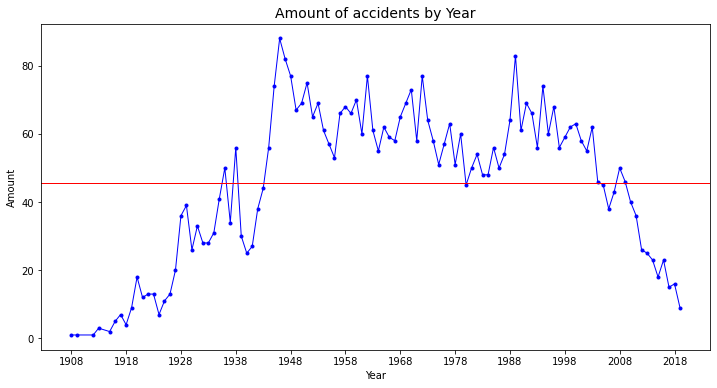

In [ ]:
Temp = data.groupby(data.Date.dt.year)[['Date']].count() 
Temp = Temp.rename(columns={"Date": "Count"})
# mean = data['Date'].count()
mean = [np.mean(Temp)]

plt.figure(figsize=(12,6))
plt.plot(Temp.index, 'Count', data=Temp, color='blue', marker = ".", linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Amount', fontsize=10)
plt.title('Amount of accidents by Year', loc='Center', fontsize=14)
plt.xticks([x for x in range(1908,2020,10)])
#plt.Line2D.draw(Xdata, Ydata, drawStyles="steps-mid")
plt.axhline(y=mean, color='Red', linestyle='-', linewidth=1)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of accidents by Month')

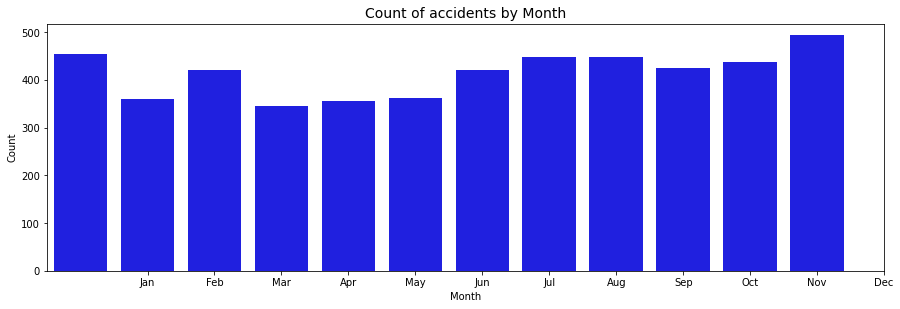

In [ ]:
gs = gridspec.GridSpec(2, 2)
pl.figure(figsize=(15,10))
plt.style.use('seaborn-muted')
ax = pl.subplot(gs[0, :]) 
sns.barplot(data.groupby(data.Date.dt.month)[['Date']].count().index, 'Date', data=data.groupby(data.Date.dt.month)[['Date']].count(), color='blue', linewidth=2)
plt.xticks(data.groupby(data.Date.dt.month)[['Date']].count().index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Month', loc='Center', fontsize=14)


Text(0.5, 1.0, 'Amount of accidents by type')

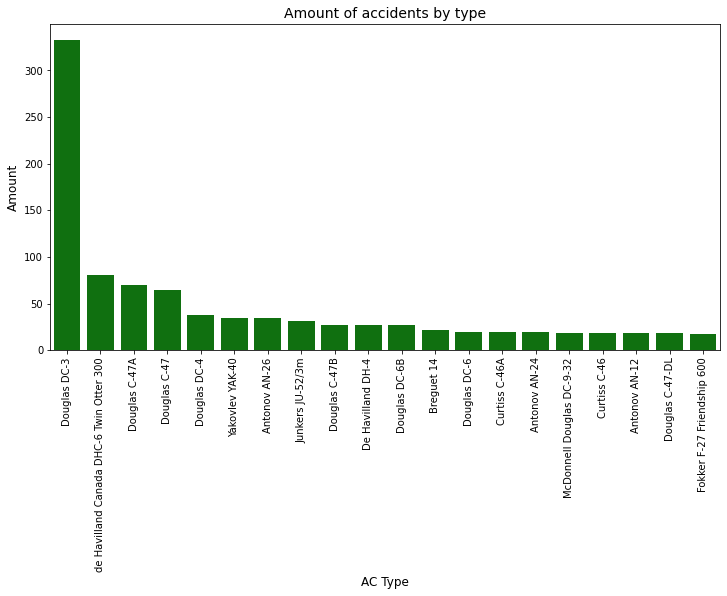

In [ ]:
Type = data.groupby('AC Type')[['AC Type']].count()
Type = Type.rename(columns={'AC Type': "Count"})
Type = Type.sort_values(by='Count', ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=Type.index, y="Count", data=Type, color='green')
plt.xticks(rotation=90)
plt.xlabel('AC Type', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.title('Amount of accidents by type', loc='Center', fontsize=14)


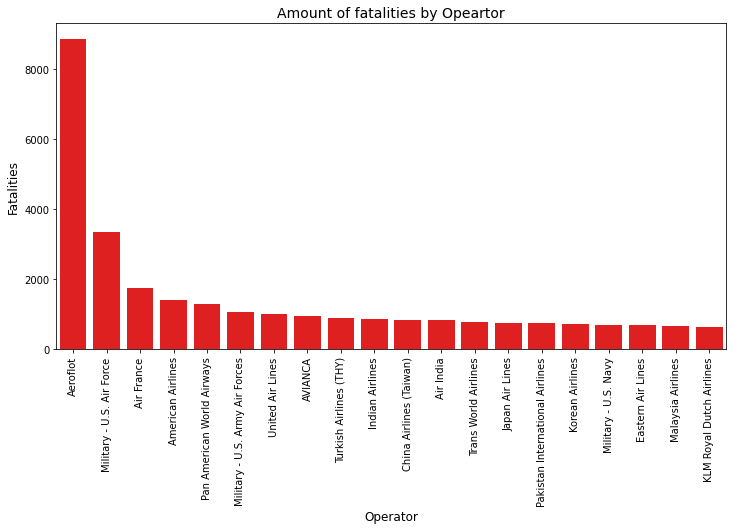

In [ ]:
Fatalities = data.groupby('Operator')[['Fatalities']].sum()
Fatalities = Fatalities.rename(columns={"Operator": "Fatalities"})
Fatalities = Fatalities.sort_values(by='Fatalities', ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=Fatalities.index, y="Fatalities", data=Fatalities, color='red')
plt.xticks(rotation=90)
plt.xlabel('Operator', fontsize=12)
plt.ylabel('Fatalities', fontsize=12)
plt.title('Amount of fatalities by Opeartor', loc='Center', fontsize=14)
plt.show()

Text(0.5, 1.0, 'Amount by Opeartor')

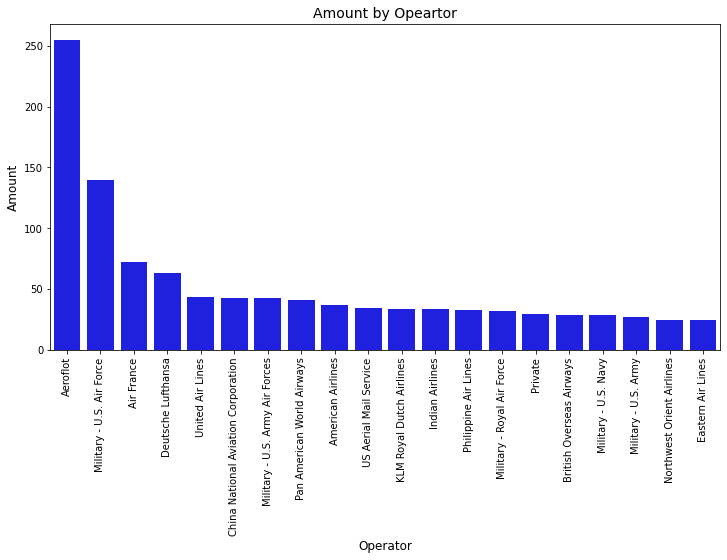

In [ ]:
Operator = data.groupby('Operator')[['Operator']].count()
Operator = Operator.rename(columns={"Operator": "Count"})
Operator = Operator.sort_values(by='Count', ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=Operator.index, y="Count", data=Operator, color='blue')
plt.xticks(rotation=90)
plt.xlabel('Operator', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.title('Amount by Opeartor', loc='Center', fontsize=14)


The bar chart shown shows that Aeroflot has had the most plane crashes since 1908.  in second place is the US air force.  in addition, there are private planes in the schedule, which means that there were frequent accidents with them.

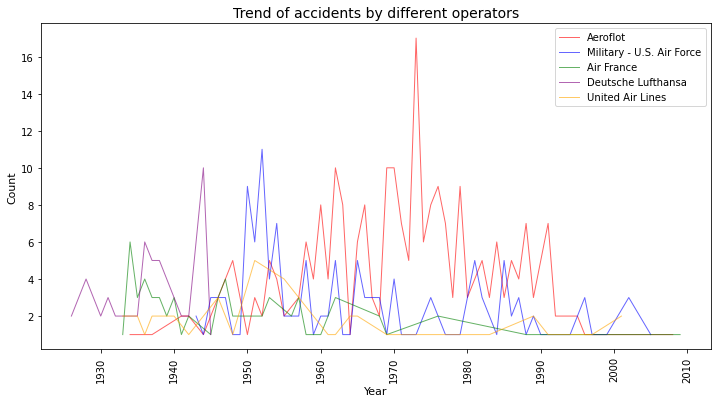

In [ ]:
Operator = data[['Operator','Fatalities']].groupby('Operator').agg(['sum','count'])
accidents = Operator['Fatalities','count'].sort_values(ascending=False)
MostAccident = accidents.index.values.tolist()[0:5]

Op1 = data[data.Operator == MostAccident[0]]
Op2 = data[data.Operator == MostAccident[1]]
Op3 = data[data.Operator == MostAccident[2]]
Op4 = data[data.Operator == MostAccident[3]]
Op5 = data[data.Operator == MostAccident[4]]
Yr1 = Op1.groupby(data.Date.dt.year)[['Date']].count()
Yr1 = Yr1.rename(columns={"Date": MostAccident[0]})
Yr2 = Op2.groupby(data.Date.dt.year)[['Date']].count()
Yr2 = Yr2.rename(columns={"Date": MostAccident[1]})
Yr3 = Op3.groupby(data.Date.dt.year)[['Date']].count()
Yr3 = Yr3.rename(columns={"Date": MostAccident[2]})
Yr4 = Op4.groupby(data.Date.dt.year)[['Date']].count()
Yr4 = Yr4.rename(columns={"Date": MostAccident[3]})
Yr5 = Op5.groupby(data.Date.dt.year)[['Date']].count()
Yr5 = Yr5.rename(columns={"Date": MostAccident[4]})

plt.figure(figsize=(12,6))
plt.plot(Yr1.index, MostAccident[0], data=Yr1, color='red', alpha=0.6, linewidth=1)
plt.plot(Yr2.index, MostAccident[1], data=Yr2, color='blue', alpha=0.6, linewidth=1)
plt.plot(Yr3.index, MostAccident[2], data=Yr3, color='green', alpha=0.6,linewidth=1)
plt.plot(Yr4.index, MostAccident[3], data=Yr4, color='purple', alpha=0.6, linewidth=1)
plt.plot(Yr5.index, MostAccident[4], data=Yr5, color='orange', alpha=0.6, linewidth=1)
plt.xticks([x for x in range(1930,2020,10)], rotation='vertical')
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.title('Trend of accidents by different operators', loc='Center', fontsize=14)
plt.show()

Introduced line graph shows us the relationship between the amount of plane crashes of each of the airlines represented on graph and the year when it happened.  As we can see, the worst time for Aeroflot was between 1970 and 1980, where the most disasters occurred.  For a company such as Air France, the number of accidents has recently dropped to zero.   The greatest number of disasters for the US military occurred during the Second World War - between 1940 and 1950.

In [ ]:
Fatalities = data.groupby(data.Date.dt.year).sum()

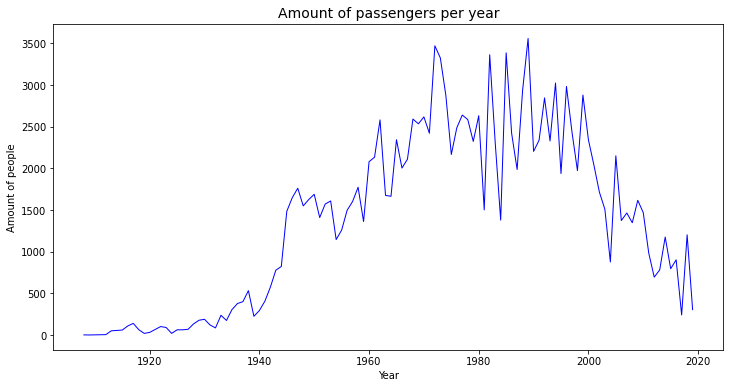

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(Temp.index, 'Aboard', data=Fatalities, color="Blue", linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Amount of people', fontsize=10)
plt.title("Amount of passengers per year", loc='Center', fontsize=14)

plt.show()

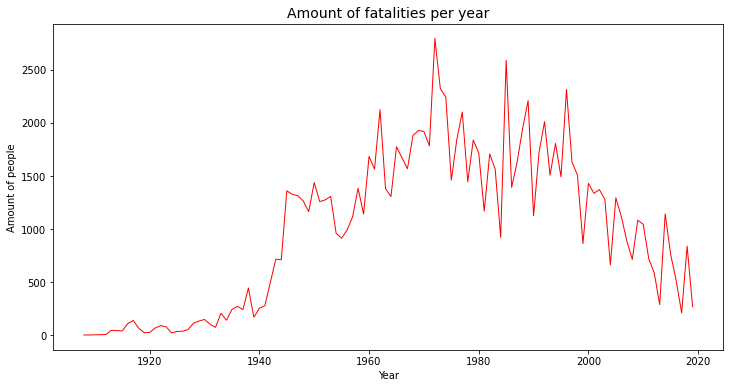

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(Temp.index, 'Fatalities', data=Fatalities, color="Red", linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Amount of people', fontsize=10)
plt.title("Amount of fatalities per year", loc='Center', fontsize=14)

plt.show()

The line graph shows us the number of plane crash deaths over the years.  from 1920 to 1970 it increased sharply.  then it gradually began to fall, but this is more like the lack of information in the dataset.